In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100 )

In [3]:
training_data = pd.read_csv('./optical+recognition+of+handwritten+digits/optdigits.tra', header=None)
test_data = pd.read_csv('./optical+recognition+of+handwritten+digits/optdigits.tes', header=None)

In [4]:
print(training_data.shape)
print(test_data.shape)

(3823, 65)
(1797, 65)


In [5]:
xtr = training_data.loc[:,:63]
ytr = training_data.loc[:,64]
xte = test_data.loc[:,:63]
yte = test_data.loc[:,64]

In [6]:
full_x_df = pd.concat([pd.DataFrame(xtr),pd.DataFrame(xte)], axis = 0)
full_y_df = pd.concat([pd.DataFrame(ytr),pd.DataFrame(yte)], axis = 0)

full_x_df.columns = ['x'+str(x) for x in full_x_df.columns]
full_y_df.columns = ['Target']

In [7]:
full_y_df.describe()

,Target
count,5620.000000
mean,4.495196
std,2.868131
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [8]:
full_y_df.value_counts().sort_index()

Target
0         554
1         571
2         557
3         572
4         568
5         558
6         558
7         566
8         554
9         562
Name: count, dtype: int64

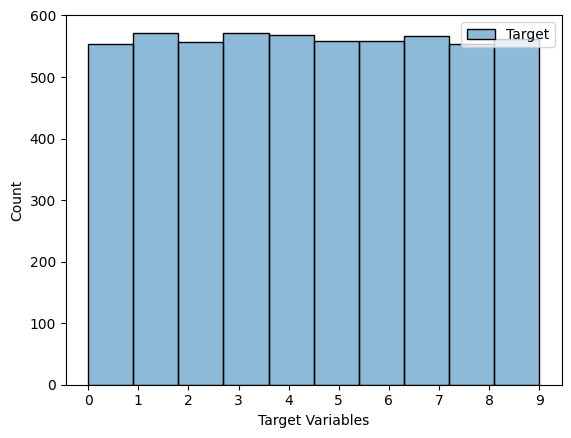

In [9]:
sns.histplot(full_y_df, bins = 10)
plt.xticks(range(0,10),range(0,10))
plt.xlabel('Target Variables')
plt.show()

In [10]:
full_x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,5620.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
x1,5620.0,0.302135,0.879962,0.0,0.0,0.0,0.0,8.0
x2,5620.0,5.393238,4.672719,0.0,1.0,5.0,9.0,16.0
x3,5620.0,11.815480,4.255952,0.0,10.0,13.0,15.0,16.0
x4,5620.0,11.578292,4.462546,0.0,9.0,13.0,15.0,16.0
x5,5620.0,5.593772,5.631149,0.0,0.0,4.0,10.0,16.0
x6,5620.0,1.379359,3.356633,0.0,0.0,0.0,0.0,16.0
x7,5620.0,0.138256,1.046998,0.0,0.0,0.0,0.0,16.0
x8,5620.0,0.003203,0.090423,0.0,0.0,0.0,0.0,5.0
x9,5620.0,1.971174,3.098815,0.0,0.0,0.0,3.0,16.0


In [11]:
full_x_df.isna().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
dtype: int64

In [12]:
full_x_df.shape[1]

64

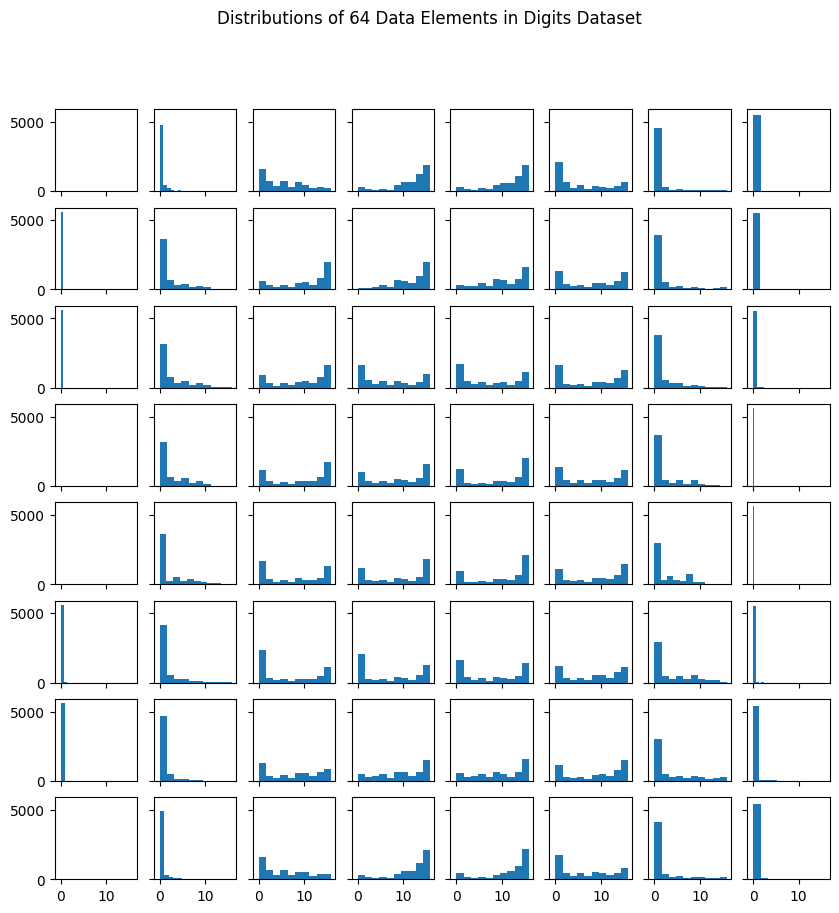

In [13]:
fig, ax = plt.subplots(8, 8, figsize = (10,10), sharex = True, sharey= True)

for i, col in enumerate(full_x_df.columns):
    temp_df = full_x_df.loc[:,col]
    c = i // 8
    r = i % 8
    ax[c,r].hist(temp_df)

plt.suptitle('Distributions of 64 Data Elements in Digits Dataset')
plt.show()

In [14]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(full_x_df)
full_x_df_scale = pd.DataFrame(x_scale)
full_x_df_scale.columns = full_x_df.columns

In [15]:
full_x_df_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,5620.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0
x1,5620.0,0.037767,0.109995,0.0,0.0000,0.000000,0.000000,1.0
x2,5620.0,0.337077,0.292045,0.0,0.0625,0.312500,0.562500,1.0
x3,5620.0,0.738468,0.265997,0.0,0.6250,0.812500,0.937500,1.0
x4,5620.0,0.723643,0.278909,0.0,0.5625,0.812500,0.937500,1.0
x5,5620.0,0.349611,0.351947,0.0,0.0000,0.250000,0.625000,1.0
x6,5620.0,0.086210,0.209790,0.0,0.0000,0.000000,0.000000,1.0
x7,5620.0,0.008641,0.065437,0.0,0.0000,0.000000,0.000000,1.0
x8,5620.0,0.000641,0.018085,0.0,0.0000,0.000000,0.000000,1.0
x9,5620.0,0.123198,0.193676,0.0,0.0000,0.000000,0.187500,1.0


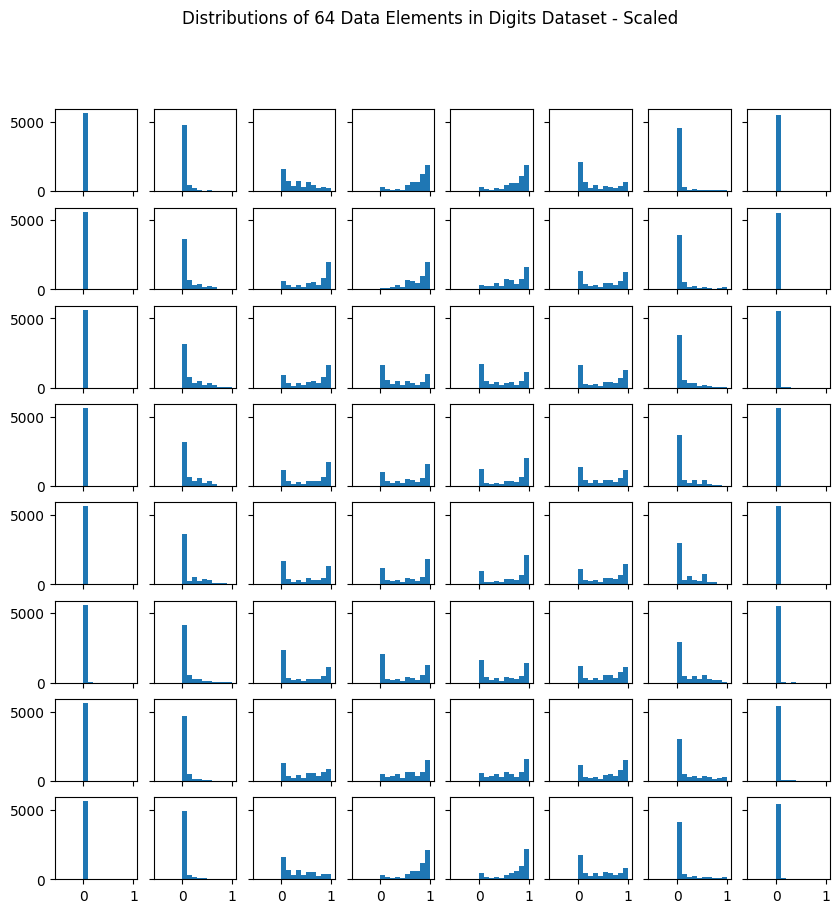

In [16]:
fig, ax = plt.subplots(8, 8, figsize = (10,10), sharex = True, sharey= True)

for i, col in enumerate(full_x_df_scale.columns):
    temp_df = full_x_df_scale.loc[:,col]
    c = i // 8
    r = i % 8
    ax[c,r].hist(temp_df)

plt.suptitle('Distributions of 64 Data Elements in Digits Dataset - Scaled')
plt.show()

In [17]:
full_df = pd.concat([full_y_df.reset_index(drop=True),full_x_df_scale.reset_index(drop=True)], axis = 1)

In [18]:
col_head = ['target']
col_head.extend(full_df.columns[1:].to_list())
full_df.columns = col_head
# full_df.head()

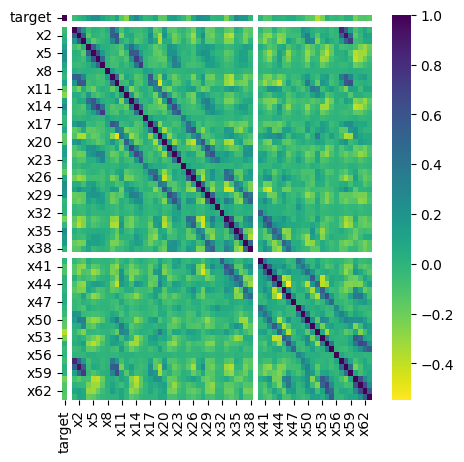

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.corr(), cmap='viridis_r')

plt.show()

In [24]:
full_df.corr()

,target,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63
target,1.000000,NaN,-0.053932,-0.004294,0.023991,0.132172,0.236762,0.228433,0.091637,0.019960,-0.018037,0.101700,-0.144789,-0.270071,0.114344,0.265646,0.087235,-0.027718,-0.004429,0.072969,-0.154231,-0.147290,0.108976,0.134597,0.036161,-0.034143,-0.167908,0.069314,0.247049,0.211186,0.192397,-0.016533,-0.002002,-0.005153,-0.230710,-0.022569,0.259867,0.164235,0.164309,-0.013693,NaN,-0.013593,-0.128047,-0.110321,0.013586,0.002967,-0.007706,0.040916,0.046154,-0.013914,-0.039503,-0.136792,-0.162899,-0.374708,-0.238509,0.024082,-0.040498,-0.016416,-0.057141,0.015565,0.005120,-0.222228,-0.123662,-0.123020,-0.147328
x0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,-0.053932,NaN,1.000000,0.549867,0.196655,-0.061135,0.019099,0.002582,-0.039939,0.041516,0.522575,0.191570,-0.105102,0.050534,-0.030165,-0.040183,-0.047558,-0.002411,0.144919,-0.167713,-0.116487,0.152136,-0.119427,-0.133599,-0.038923,-0.011226,-0.094399,-0.195806,0.039697,0.101769,-0.171857,-0.156589,-0.016406,-0.010247,-0.156334,-0.191071,0.031502,-0.010320,-0.176766,-0.139793,NaN,-0.027031,-0.125823,-0.132460,0.017495,-0.098009,-0.143363,-0.071547,-0.028409,-0.019780,0.203486,0.142391,0.019250,-0.014444,-0.002440,0.030255,-0.046135,-0.006479,0.833236,0.537022,0.116788,-0.092348,-0.000868,0.078344,-0.020594
x2,-0.004294,NaN,0.549867,1.000000,0.556814,-0.136197,0.002095,-0.008764,-0.051748,-0.002560,0.550041,0.599381,-0.230219,0.035267,0.074383,-0.064147,-0.083372,-0.025561,0.254090,-0.103014,-0.336673,0.215125,-0.034479,-0.201951,-0.106234,-0.034238,-0.140430,-0.320447,0.041714,0.241107,-0.161405,-0.213381,-0.051955,-0.034445,-0.314414,-0.387657,-0.033873,-0.049350,-0.236671,-0.133655,NaN,-0.090310,-0.249237,-0.283655,-0.100320,-0.254477,-0.223973,-0.050807,-0.068654,-0.066492,0.181511,0.347186,0.042103,-0.126980,0.048780,0.054412,-0.036299,-0.021779,0.500920,0.926674,0.468903,-0.149310,-0.018809,0.116831,0.088882
x3,0.023991,NaN,0.196655,0.556814,1.000000,0.027040,-0.161522,-0.072674,-0.017039,0.014947,0.290290,0.576812,0.034354,-0.050993,0.056733,-0.119286,-0.072117,0.008936,0.191955,0.063660,-0.357015,0.053337,0.030711,-0.186197,-0.116386,0.016782,-0.085046,-0.244718,-0.079610,0.129525,-0.147355,-0.147316,-0.041434,-0.049194,-0.253618,-0.249027,-0.000271,-0.061721,-0.212411,-0.006098,NaN,-0.140751,-0.276802,-0.105810,-0.043095,-0.294325,-0.228002,0.106121,0.014710,-0.110971,-0.043170,0.328971,0.273435,-0.243327,-0.006273,0.132909,0.035303,-0.019134,0.158605,0.549038,0.738634,-0.066774,-0.038386,0.069017,0.070791
x4,0.132172,NaN,-0.061135,-0.136197,0.027040,1.000000,0.531349,0.165290,0.025736,0.020549,-0.029926,-0.066882,-0.120293,0.174973,0.440353,0.182856,0.027979,0.025504,-0.044426,-0.160919,-0.098968,-0.030574,0.196830,0.143388,0.025882,0.011637,-0.008591,-0.064340,0.102190,0.112678,0.153848,0.109656,0.013884,0.018870,-0.040618,-0.032541,0.017467,0.047663,0.115415,0.092214,NaN,0.047097,-0.031299,-0.129357,-0.083853,0.049424,0.076862,-0.106510,-0.023410,0.038435,-0.058702,-0.212912,-0.117275,-0.011894,-0.133567,-0.285020,-0.153073,0.016583,-0.083323,-0.062568,-0.037806,-0.088337,-0.235855,-0.301649,-0.185907
x5,0.236762,NaN,0.019099,0.002095,-0.161522,0.531349,1.000000,0.612324,0.158674,0.004653,-0.033073,-0.018460,-0.200466,-0.048202,0.566029,0.556845,0.134107,-0.007302,-0.024938,-0.154580,-0.177671,-0.061745,0.214586,0.219816,0.026137,-0.025704,0.007032,-0.069151,0.135274,0.209385,0.186832,0.040287,-0.024661,-0.015866,-0.152402,-0.115638,0.029732,0.123783,0.106418,-0.039180,NaN,-0.025055,-0.161135,-0.31873

<h4> Numeric Data Representations </h4>

In [55]:
full_df.loc[full_df.target == 2,'x0':].shape

(557, 64)

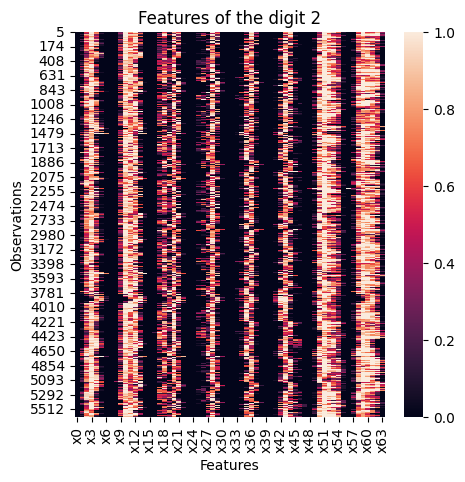

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 2,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 2')
plt.show()

In [56]:
full_df.loc[full_df.target == 7,'x0':].shape

(566, 64)

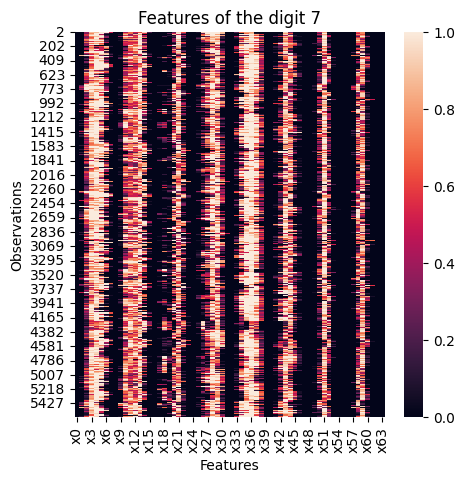

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 7,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 7')
plt.show()

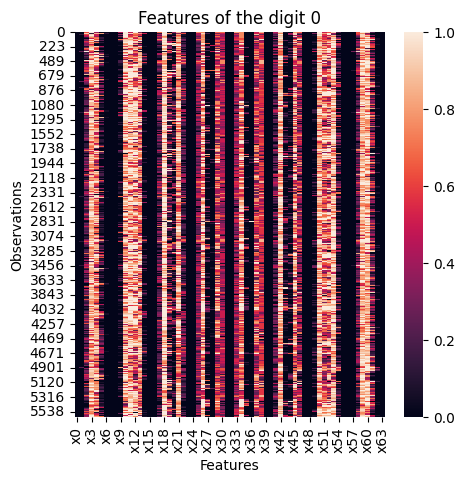

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 0,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 0')
plt.show()

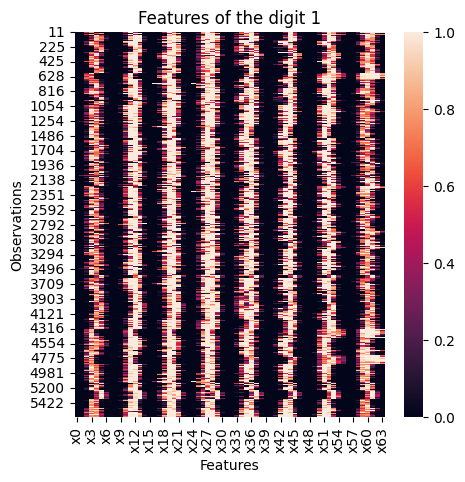

In [48]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 1,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 1')
plt.show()

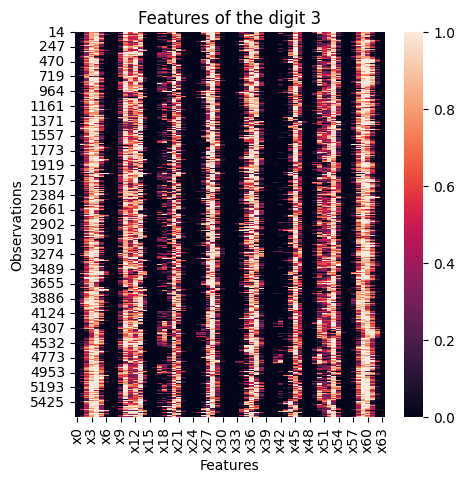

In [49]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 3,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 3')
plt.show()

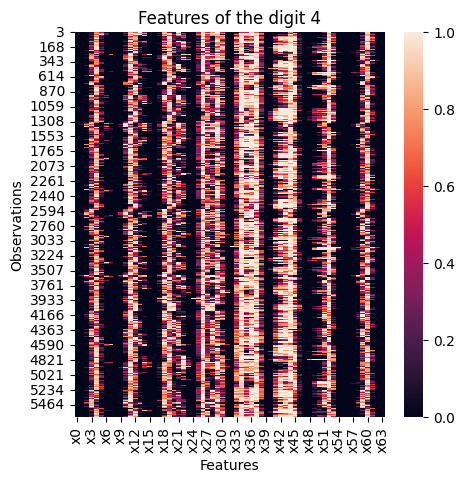

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 4,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 4')
plt.show()

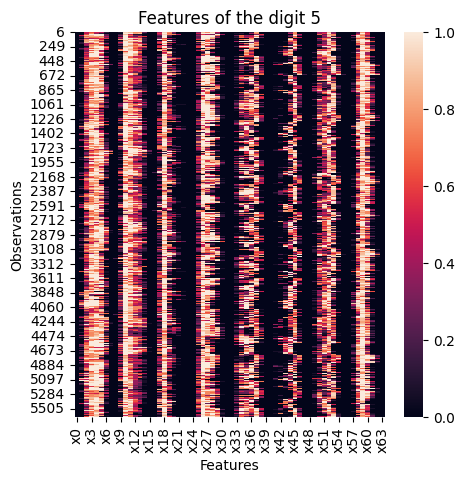

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 5,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 5')
plt.show()

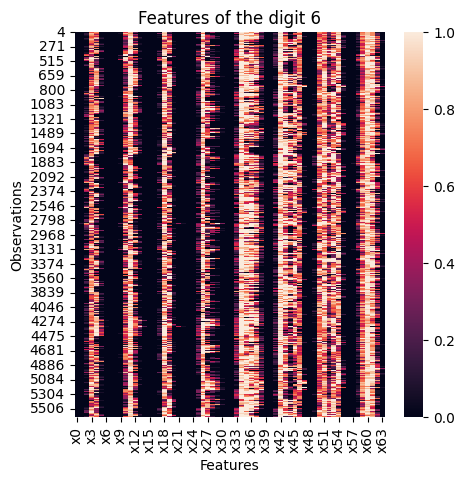

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 6,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 6')
plt.show()

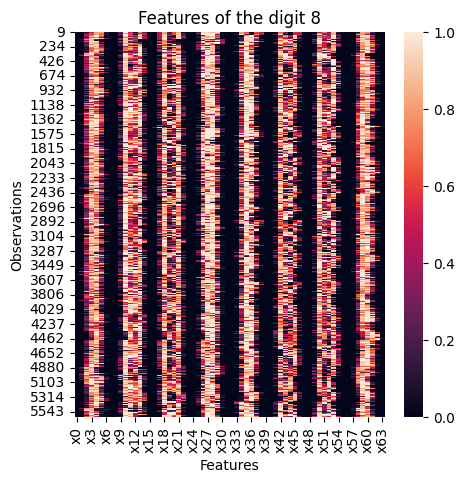

In [53]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 8,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 8')
plt.show()

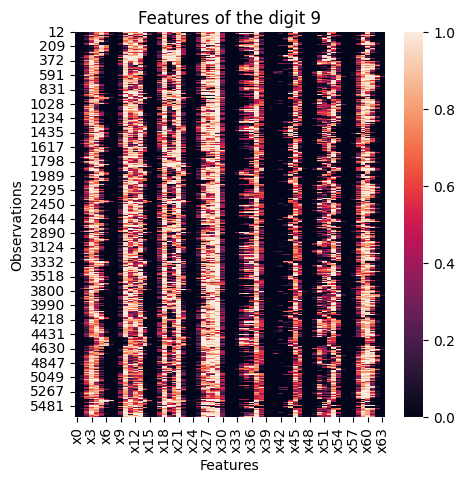

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(full_df.loc[full_df.target == 9,'x0':])

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Features of the digit 9')
plt.show()